In [119]:
## Lib
import cv2
import cv2.aruco as aruco

import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams['figure.dpi']= 280

import numpy as np
from numpy.linalg import norm

import math as m

## Define IDs
TABLE_TAG_ID = 42
RED_TAG_ID = 47
GREEN_TAG_ID = 13
BLUE_TAG_ID = 36
BACK_TAG_ID = 17

## Define table dimensions in mm
TABLE_TAG_SIZE = 100
TABLE_TAG_LEFT_CORNER_X_OFFSET = 50
TABLE_TAG_LEFT_CORNER_Y_OFFSET = 200 

TABLE_LENGTH = 3000
TABLE_WIDTH = 2000

EXCAVATION_SITE_SIZE = 350
RIGHT_EXCAVATION_ZERO = [800, 1200]
LEFT_EXCAVATION_ZERO = [1850, 1200]

HEX_SIZE = 150

In [103]:
def findAruco(img, markerSize = 4, totalMarkers = 250) :
    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    arucoRequest = getattr(aruco, f'DICT_{markerSize}X{markerSize}_{totalMarkers}')
    arucoDict = aruco.Dictionary_get(arucoRequest)
    arucoParam = aruco.DetectorParameters_create()
    bBoxes, ids, _ = aruco.detectMarkers(grayImg, arucoDict, parameters = arucoParam)

    ids = np.array(ids)
    bBoxes = np.array(bBoxes)

    return ids, bBoxes

In [104]:
def BGR2RGB(img) :
    img2Display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img2Display

In [105]:
def findTableTag(ids, bBoxes, traceMarkers = True) :
    tableTagIndex = 0

    try :
        while ids[tableTagIndex, 0] != TABLE_TAG_ID:
            tableTagIndex += 1
    except :
        print("No table center found on the playfield")

    tableTagBBox = (bBoxes[tableTagIndex])[0]
    tableTagTopLeftCorner = tableTagBBox[0]

    if traceMarkers :
        plt.scatter(tableTagTopLeftCorner[0], tableTagTopLeftCorner[1], s = 5, color = '#00FFFF', alpha = 0.5, marker = 's', linewidth = 0.5)

        tagBBox = plt.Polygon(tableTagBBox, closed = True, fill = False, edgecolor = '#00FFFF', linewidth = 1, alpha = 0.5)
        ax.add_patch(tagBBox)

    return(tableTagBBox)
    


In [106]:
def findTableCenter(ids, bBoxes, traceMarkers = True) :
    tableTagBBox = findTableTag(ids, bBoxes)

    scaleFactor = norm(tableTagBBox[1] - tableTagBBox[0], 2, axis = 0) / TABLE_TAG_SIZE

    tableCenter = tableTagBBox[0] + [-TABLE_TAG_LEFT_CORNER_X_OFFSET * scaleFactor, TABLE_TAG_LEFT_CORNER_Y_OFFSET * scaleFactor]

    if traceMarkers :
        plt.scatter(tableCenter[0], tableCenter[1], marker = '+', color = '#00FFFF', alpha = 0.5, linewidth = 0.8)

    return tableCenter, scaleFactor
    

In [107]:
def findTableBoundaries (ids, bBoxes, traceMarkers = True) :
    tableCenter, scaleFactor = findTableCenter(ids, bBoxes)

    tableZero = tableCenter + [TABLE_LENGTH * scaleFactor / 2, TABLE_WIDTH * scaleFactor / 2]

    if traceMarkers : 
        plt.scatter(tableZero[0], tableZero[1], s = 5, color = '#00FFFF', alpha = 0.5, marker = 's', linewidth = 0.5)
        plt.text(tableZero[0] + 10, tableZero[1] - 10, '({}, {})'.format('0', '0'), color = '#00FFFF', fontsize = 5)

        plt.scatter(tableZero[0] - TABLE_LENGTH * scaleFactor, tableZero[1], s = 5, color = '#00FFFF', alpha = 0.5, marker = 's', linewidth = 0.5)
        plt.text(tableZero[0] + 10 - TABLE_LENGTH * scaleFactor, tableZero[1] - 10, '({}, {})'.format(TABLE_LENGTH, '0'), color = '#00FFFF', fontsize = 5)

        plt.scatter(tableZero[0] - TABLE_LENGTH * scaleFactor, tableZero[1] - TABLE_WIDTH * scaleFactor, s = 5, color = '#00FFFF', alpha = 0.5, marker = 's', linewidth = 0.5)
        plt.text(tableZero[0] + 10 - TABLE_LENGTH * scaleFactor, tableZero[1] - 10 - TABLE_WIDTH * scaleFactor, '({}, {})'.format(TABLE_LENGTH, TABLE_WIDTH), color = '#00FFFF', fontsize = 5)

        plt.scatter(tableZero[0], tableZero[1] - TABLE_WIDTH * scaleFactor, s = 5, color = '#00FFFF', alpha = 0.5, marker = 's', linewidth = 0.5)
        plt.text(tableZero[0] + 10, tableZero[1] - 10 - TABLE_WIDTH * scaleFactor, '({}, {})'.format('0', TABLE_WIDTH), color = '#00FFFF', fontsize = 5)

        yAxisArrow = plt.arrow(tableZero[0], tableZero[1], 0, -250, color = '#00FFFF', alpha = 0.5, linewidth = 0.5, head_width = 20)
        ax.add_patch(yAxisArrow)   

        xAxisArrow = plt.arrow(tableZero[0], tableZero[1], -250, 0, color = '#00FFFF', alpha = 0.5, linewidth = 0.5, head_width = 20)
        ax.add_patch(xAxisArrow)  

    return(tableZero, scaleFactor)

In [108]:
def traceExcavationSite (tableZero, scaleFactor, traceMarkers = True) :

    leftExcavationSiteCorner = tableZero - [LEFT_EXCAVATION_ZERO[0] * scaleFactor, LEFT_EXCAVATION_ZERO[1] *scaleFactor]
    rightExcavationSiteCorner = tableZero - [RIGHT_EXCAVATION_ZERO[0] * scaleFactor, RIGHT_EXCAVATION_ZERO[1] *scaleFactor]

    leftExcavationSiteZone = plt.Rectangle(leftExcavationSiteCorner, -EXCAVATION_SITE_SIZE * scaleFactor, -EXCAVATION_SITE_SIZE * scaleFactor,
    fill = True, edgecolor = '#00FFFF', linewidth = 1, alpha = 0.5)
    rightExcavationSiteZone = plt.Rectangle(rightExcavationSiteCorner, -EXCAVATION_SITE_SIZE * scaleFactor, -EXCAVATION_SITE_SIZE * scaleFactor,
    fill = True, edgecolor = '#00FFFF', linewidth = 1, alpha = 0.5)

    if traceMarkers :
        plt.scatter(leftExcavationSiteCorner[0], leftExcavationSiteCorner[1], s = 5, color = '#00FFFF', alpha = 0.5, marker = 's', linewidth = 0.5)
        ax.add_patch(leftExcavationSiteZone)

        plt.scatter(rightExcavationSiteCorner[0], rightExcavationSiteCorner[1], s = 5, color = '#00FFFF', alpha = 0.5, marker = 's', linewidth = 0.5)
        ax.add_patch(rightExcavationSiteZone)

    return leftExcavationSiteCorner, rightExcavationSiteCorner

In [109]:
def hexBoundaries (hexCenter, scaleFactor, angle = 0) :
    hexCorner = []
    hexSizePixel = HEX_SIZE * scaleFactor / 2

    for i in range(0, 7) :
        xcoord = hexCenter[0] + hexSizePixel * m.cos(angle + i * m.pi/3)
        ycoord = hexCenter[1] - hexSizePixel * m.sin(angle + i * m.pi/3)
        hexCorner.append([xcoord, ycoord])

    return hexCorner


In [110]:
def traceHexArea (tableZero, scaleFactor) :
    rightBlueHexCenter = tableZero - [900 * scaleFactor, 555 * scaleFactor]
    rightGreenHexCenter = tableZero - [830 * scaleFactor, 675* scaleFactor]
    rightRedHexCenter = tableZero - [900 * scaleFactor, 795 * scaleFactor]

    leftBlueHexCenter = tableZero - [2100 * scaleFactor, 555 * scaleFactor]
    leftGreenHexCenetr = tableZero - [2170 * scaleFactor, 675 * scaleFactor]
    leftRedHexCenter = tableZero - [2100 * scaleFactor, 795 * scaleFactor]


    ax.add_patch(plt.Polygon(hexBoundaries(rightBlueHexCenter, scaleFactor, m.pi/2), closed = True, fill = True,
    edgecolor = '#00FFFF', linewidth = 0.5, alpha = 0.5))
    ax.add_patch(plt.Polygon(hexBoundaries(rightGreenHexCenter, scaleFactor, m.pi/2), closed = True, fill = True,
    edgecolor = '#00FFFF', linewidth = 0.5, alpha = 0.5))
    ax.add_patch(plt.Polygon(hexBoundaries(rightRedHexCenter, scaleFactor, m.pi/2), closed = True, fill = True,
    edgecolor = '#00FFFF', linewidth = 0.5, alpha = 0.5))

    ax.add_patch(plt.Polygon(hexBoundaries(leftBlueHexCenter, scaleFactor, m.pi/2), closed = True, fill = True,
    edgecolor = '#00FFFF', linewidth = 0.5, alpha = 0.5))
    ax.add_patch(plt.Polygon(hexBoundaries(leftGreenHexCenetr, scaleFactor, m.pi/2), closed = True, fill = True,
    edgecolor = '#00FFFF', linewidth = 0.5, alpha = 0.5))
    ax.add_patch(plt.Polygon(hexBoundaries(leftRedHexCenter, scaleFactor, m.pi/2), closed = True, fill = True,
    edgecolor = '#00FFFF', linewidth = 0.5, alpha = 0.5))

In [111]:
def hexAngle (bBoxes) :
    hexAngles = []

    for i in range(0, len(bBoxes)) :
        long = norm(bBoxes[i,0, 1] - bBoxes[i, 0, 2], axis = 0)
        proj = abs(bBoxes[i, 0, 1, 1] - bBoxes[i, 0, 2, 1])
        cosangle = proj / long
        hexAngles.append(np.arccos(cosangle) + m.pi/2)

    return(hexAngles)

In [112]:
def hexCenter (bBoxes) :
    hexCenters = []
    bBoxes = np.array(bBoxes)

    for i in range(0, len(bBoxes)) :
        hexCenters.append(np.mean(bBoxes[i, 0], axis = 0))

    return(hexCenters)

In [113]:
def findHexOnTable (ids, bBoxes, scaleFactor) :
    hexCenters = hexCenter(bBoxes)
    hexAngles = hexAngle(bBoxes)

    for i in range(0, len(ids)) :
        if ids[i] != TABLE_TAG_ID :
            boundaries = hexBoundaries(hexCenters[i], scaleFactor, hexAngles[i])
            color = '#BFBFBF'

            if ids[i] == RED_TAG_ID :
                color = '#A81800'
            elif ids[i] == GREEN_TAG_ID :
                color = '#3EB73C'
            elif ids[i] == BLUE_TAG_ID :
                color == '#1784FF'
            elif ids[i] == BACK_TAG_ID :
                color = '#CD743A'
            
            plt.scatter(hexCenters[i][0], hexCenters[i][1], s = 5, color = color, marker = 's', linewidth = 0.5)
            ax.add_patch(plt.Polygon(boundaries, closed = True, fill = True, edgecolor = color, linewidth = 1, alpha = 0.5))

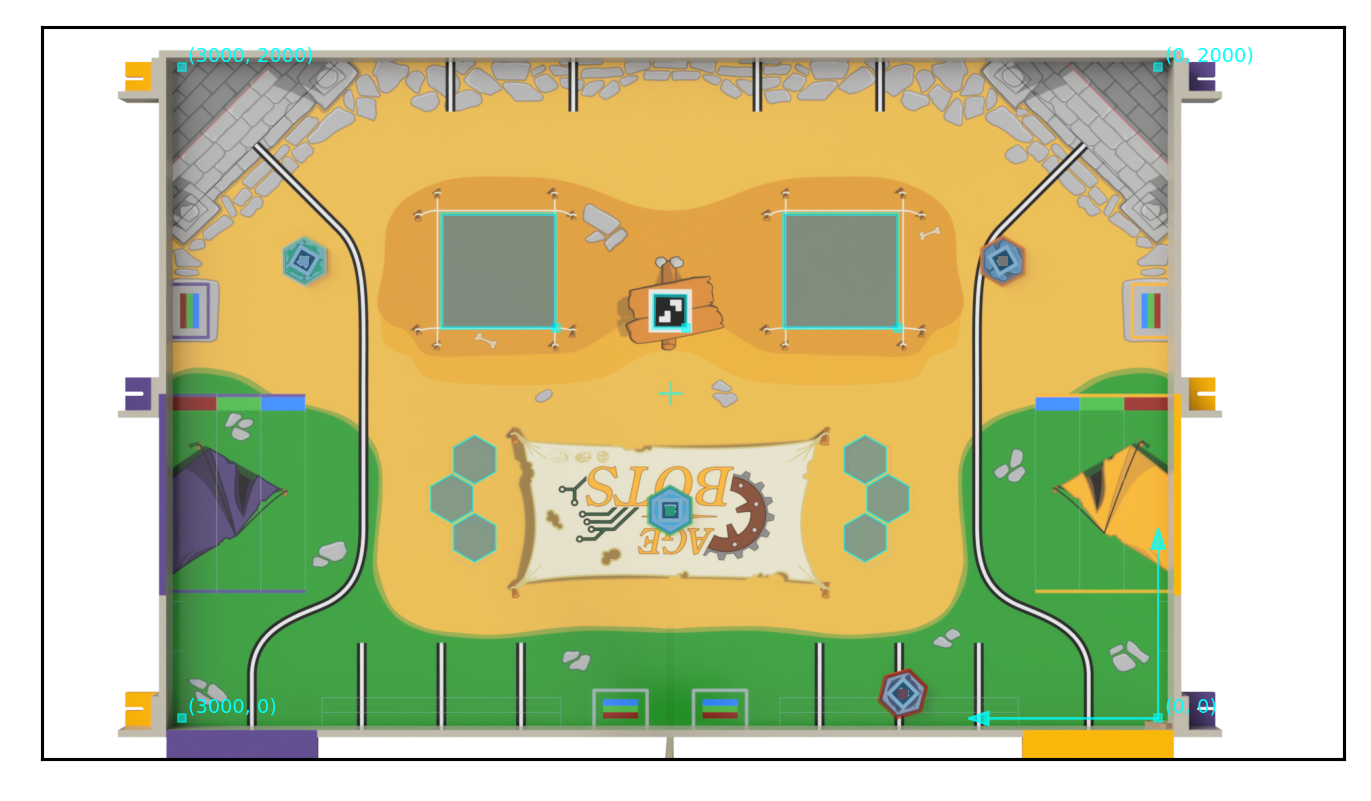

In [116]:
img = cv2.imread("RawData/TableWithElement1.png")
#img = cv2.imread("RawData/EmptyTable.png")
ids, bBoxes = findAruco(img)

img2Display = BGR2RGB(img)
fig = plt.imshow(img2Display)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

ax = plt.gca()

tableZero, scaleFactor = findTableBoundaries(ids, bBoxes)
traceExcavationSite(tableZero, scaleFactor)
traceHexArea(tableZero, scaleFactor)
findHexOnTable(ids, bBoxes, scaleFactor)


plt.show()

In [115]:
print(ids)

[[47]
 [13]
 [42]
 [17]
 [36]]
